# Making a new hybrid grid file

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## Open existing hycom1 file and vcoord file

In [2]:
ds_hycom = xr.open_dataset("/g/data/x77/ahg157/inputs/mom6/panan/hycom1_75_800m.nc")
ds_vcoord = xr.open_dataset("/g/data/x77/ahg157/inputs/mom6/panan/vcoord.nc")

In [3]:
dz = np.diff(ds_vcoord.st_edges_ocean.values)

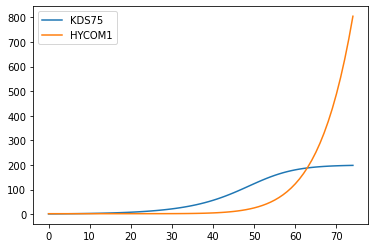

In [7]:
plt.plot(dz,label='KDS75')
plt.plot(ds_hycom.dz,label='HYCOM1')
plt.legend()

In [10]:
ds_hycom['dz'].values = dz
ds_hycom.to_netcdf('/g/data/x77/amh157/hycom1_kds75.nc')